In [1]:
# !pip install --upgrade git+https://github.com/tooha289/DataAnalysisLibrary.git

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import chi2_contingency
from DataAnalysis import eda

from matplotlib import font_manager
from tqdm import tqdm

In [3]:
pd.set_option('display.max_rows', 500)

In [4]:
font_path = "C:/Windows/Fonts/malgun.ttf"
font_family = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_family
plt.rcParams["axes.unicode_minus"] = False

# 데이터 load

In [5]:
resume = pd.read_csv("../data/resume.csv")
recruitment = pd.read_csv("../data/recruitment.csv")
apply = pd.read_csv("../data/apply_train.csv")

# 전처리

In [6]:
used_cols = ['resume_seq', 'degree', 'job_code_seq1']
resume = resume[used_cols]

used_cols = ['recruitment_seq', 'address_seq1', 'education', 'major_task', 'qualifications']
recruitment = recruitment[used_cols]

## 타입 변경

In [7]:
res_categorical_cols = ['degree', 'job_code_seq1']
rec_categorical_cols = ['address_seq1', 'education', 'major_task', 'qualifications']
resume[res_categorical_cols] = resume[res_categorical_cols].astype('category')
recruitment[rec_categorical_cols] = recruitment[rec_categorical_cols].astype('category')

In [8]:
recruitment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   recruitment_seq  6695 non-null   object  
 1   address_seq1     6694 non-null   category
 2   education        6695 non-null   category
 3   major_task       6695 non-null   category
 4   qualifications   6695 non-null   category
dtypes: category(4), object(1)
memory usage: 79.6+ KB


## address_seq1의 na값을 최빈값으로 처리

In [9]:
recruitment['address_seq1'].describe()

count     6694.0
unique       8.0
top          3.0
freq      6490.0
Name: address_seq1, dtype: float64

In [10]:
recruitment = recruitment.fillna({'address_seq1':3}, axis=0)

## 데이터 병합

In [11]:
merged_df = resume.merge(apply, how='inner', left_on = 'resume_seq', right_on ='resume_seq')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57946 entries, 0 to 57945
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   resume_seq       57946 non-null  object  
 1   degree           57946 non-null  category
 2   job_code_seq1    57946 non-null  category
 3   recruitment_seq  57946 non-null  object  
dtypes: category(2), object(2)
memory usage: 1.4+ MB


In [12]:
merged_df = merged_df.merge(recruitment, how='inner', left_on = 'recruitment_seq', right_on ='recruitment_seq')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57946 entries, 0 to 57945
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   resume_seq       57946 non-null  object  
 1   degree           57946 non-null  category
 2   job_code_seq1    57946 non-null  category
 3   recruitment_seq  57946 non-null  object  
 4   address_seq1     57946 non-null  category
 5   education        57946 non-null  category
 6   major_task       57946 non-null  category
 7   qualifications   57946 non-null  category
dtypes: category(6), object(2)
memory usage: 1.7+ MB


# EDA

In [13]:
dav = eda.DataAnalysisVisualizer()

## 함수 정의

In [14]:
# eda function
%run ../functions/eda.py
# metric function
%run ../functions/metric.py
# submission function
%run ../functions/submission.py

## degree 분석

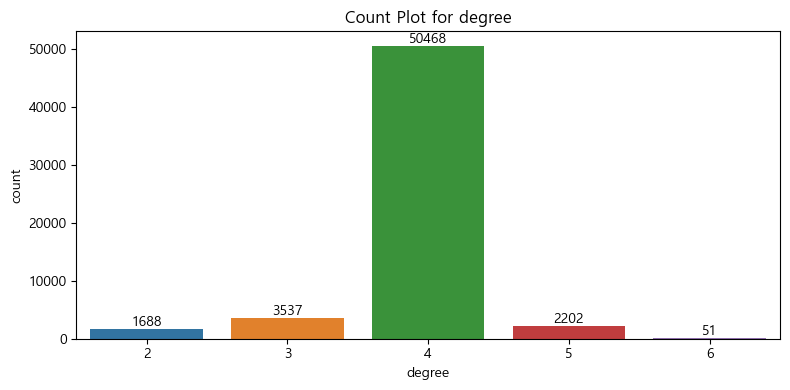

In [15]:
dav.draw_countplot(merged_df, ['degree'], figsize=(8,4))

In [16]:
# 전체 공고의 0.5% = 289.73
limit_ratio = 0.005

### degree : address_seq1

In [17]:
count_df = create_count_dataframe(merged_df, 'address_seq1', 'degree')
ratio_df_hue, ratio_df_hue_ratio = calculate_ratio_df_with_hue(merged_df, 'address_seq1', 'degree', limit_ratio)

In [18]:
count_df

degree,2,3,4,5,6,Total
address_seq1,,,,,,
1.0,3,4,20,0,0,27
2.0,0,2,4,0,0,6
3.0,1642,3420,49024,2140,50,56276
5.0,40,97,1283,54,1,1475
9.0,0,0,9,1,0,10
11.0,0,2,26,1,0,29
13.0,2,2,4,0,0,8
20.0,1,10,98,6,0,115
Total,1688,3537,50468,2202,51,57946


In [19]:
analyze_chi_square(count_df);

Chi-square Statistic: 46.29709478575211
P-value: 0.016233436442202005
Degrees of Freedom: 28
Expected Frequencies:
degree                  2            3             4            5          6
address_seq1                                                                
1.0              0.786525     1.648069     23.515618     1.026024   0.023764
2.0              0.174783     0.366238      5.225693     0.228005   0.005281
3.0           1639.351948  3435.063887  49013.515480  2138.538501  49.530183
5.0             42.967591    90.033393   1284.649501    56.051324   1.298191
9.0              0.291306     0.610396      8.709488     0.380009   0.008801
11.0             0.844787     1.770148     25.257516     1.102026   0.025524
13.0             0.233045     0.488317      6.967591     0.304007   0.007041
20.0             3.350016     7.019553    100.159114     4.370103   0.101215


In [20]:
ratio_df_hue

degree,2,3,4,5,Total
address_seq1,,,,,
3.0,0.972749,0.966921,0.971388,0.971844,0.971180
5.0,0.023697,0.027424,0.025422,0.024523,0.025455
Total,1688.000000,3537.000000,50468.000000,2202.000000,57946.000000


In [21]:
ratio_df_hue_ratio

degree,2,3,4,5,Total
address_seq1,,,,,
3.0,1.001615,0.995615,1.000214,1.000683,0.971180
5.0,0.930934,1.077378,0.998716,0.963403,0.025455
Total,1688.000000,3537.000000,50468.000000,2202.000000,57946.000000


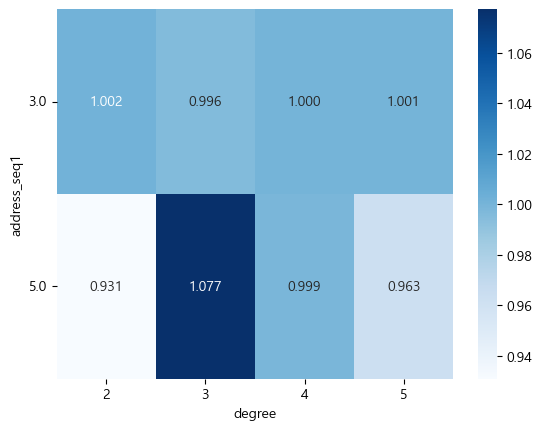

In [22]:
sns.heatmap(ratio_df_hue_ratio.iloc[:-1, :-1], cmap="Blues", annot=True, fmt=".3f")
plt.yticks(rotation=0)  # Adjust the rotation angle here (0 for horizontal, 90 for vertical)
plt.show()

### degree : education

In [23]:
count_df = create_count_dataframe(merged_df, 'education', 'degree')
ratio_df_hue, ratio_df_hue_ratio = calculate_ratio_df_with_hue(merged_df, 'education', 'degree', limit_ratio)

In [24]:
count_df

degree,2,3,4,5,6,Total
education,,,,,,
2,516,1021,12633,525,17,14712
3,727,1602,20912,844,19,24104
4,445,913,16914,832,15,19119
6,0,1,9,1,0,11
Total,1688,3537,50468,2202,51,57946


In [25]:
analyze_chi_square(count_df);

Chi-square Statistic: 158.02168472019153
P-value: 1.3282670667903588e-27
Degrees of Freedom: 12
Expected Frequencies:
degree              2            3             4           5          6
education                                                              
2          428.568943   898.014427  12813.398958  559.069202  12.948469
3          702.163255  1471.298243  20993.350223  915.973631  21.214648
4          556.947365  1167.015894  16651.670383  726.539157  16.827201
6            0.320436     0.671435      9.580437    0.418010   0.009681


In [26]:
ratio_df_hue_ratio

degree,2,3,4,5,Total
education,,,,,
2,1.204007,1.136953,0.985921,0.939061,0.253892
3,1.035372,1.088834,0.996125,0.921424,0.415973
4,0.798998,0.782337,1.015754,1.145155,0.329945
Total,1688.000000,3537.000000,50468.000000,2202.000000,57946.000000


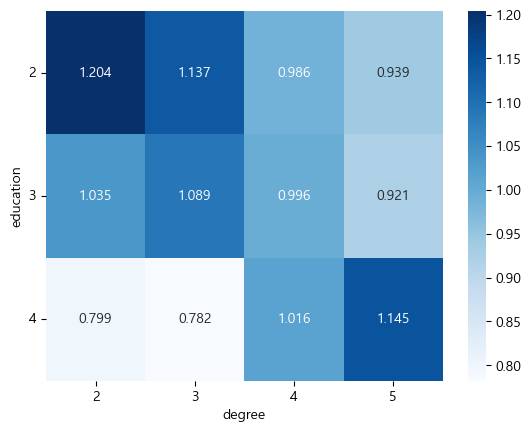

In [27]:
sns.heatmap(ratio_df_hue_ratio.iloc[:-1, :-1], cmap="Blues", annot=True, fmt=".3f")
plt.yticks(rotation=0)  # Adjust the rotation angle here (0 for horizontal, 90 for vertical)
plt.show()

### degree : major_task

In [28]:
count_df = create_count_dataframe(merged_df, 'major_task', 'degree')
ratio_df_hue, ratio_df_hue_ratio = calculate_ratio_df_with_hue(merged_df, 'major_task', 'degree', limit_ratio)

In [29]:
count_df

degree,2,3,4,5,6,Total
major_task,,,,,,
1,7,12,223,6,0,248
2,1635,3381,47787,2100,51,54954
6,0,0,5,0,0,5
7,27,54,688,28,0,797
8,19,90,1734,63,0,1906
9,0,0,17,4,0,21
10,0,0,14,1,0,15
Total,1688,3537,50468,2202,51,57946


In [30]:
analyze_chi_square(count_df);

Chi-square Statistic: 59.28658314836975
P-value: 8.049267702754641e-05
Degrees of Freedom: 24
Expected Frequencies:
degree                2            3             4            5          6
major_task                                                                
1              7.224381    15.137818    215.995306     9.424223   0.218272
2           1600.841335  3354.369551  47862.121147  2088.301315  48.366652
6              0.145653     0.305198      4.354744     0.190004   0.004401
7             23.217064    48.648552    694.146205    30.286715   0.701463
8             55.522866   116.341456   1660.028440    72.429710   1.677527
9              0.611742     1.281831     18.289925     0.798019   0.018483
10             0.436959     0.915594     13.064232     0.570013   0.013202


In [31]:
ratio_df_hue_ratio

degree,2,3,4,5,Total
major_task,,,,,
2,1.021338,1.007939,0.998430,1.005602,0.948366
7,1.162938,1.110002,0.991146,0.924498,0.013754
8,0.342201,0.773585,1.044560,0.869809,0.032893
Total,1688.000000,3537.000000,50468.000000,2202.000000,57946.000000


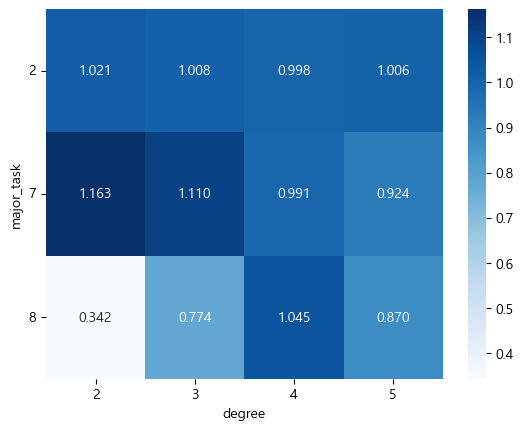

In [32]:
sns.heatmap(ratio_df_hue_ratio.iloc[:-1, :-1], cmap="Blues", annot=True, fmt=".3f")
plt.yticks(rotation=0)  # Adjust the rotation angle here (0 for horizontal, 90 for vertical)
plt.show()

### degree : qualifications

In [33]:
count_df = create_count_dataframe(merged_df, 'qualifications', 'degree')
ratio_df_hue, ratio_df_hue_ratio = calculate_ratio_df_with_hue(merged_df, 'qualifications', 'degree', limit_ratio)

In [34]:
count_df

degree,2,3,4,5,6,Total
qualifications,,,,,,
0,7,27,355,21,1,411
1,1211,2346,32768,1450,36,37811
2,470,1164,17345,731,14,19724
Total,1688,3537,50468,2202,51,57946


In [35]:
analyze_chi_square(count_df);

Chi-square Statistic: 40.96895741291627
P-value: 2.112650548542249e-06
Degrees of Freedom: 8
Expected Frequencies:
degree                    2            3             4            5          6
qualifications                                                                
0                 11.972664    25.087271    357.959963    15.618369   0.361733
1               1101.455976  2307.967884  32931.445622  1436.851931  33.278587
2                574.571360  1203.944845  17178.594415   749.529700  17.359680


In [36]:
ratio_df_hue_ratio

degree,2,3,4,5,Total
qualifications,,,,,
0,0.584665,1.076243,0.991731,1.344571,0.007093
1,1.099454,1.016479,0.995037,1.009151,0.652521
2,0.818001,0.966822,1.009687,0.975278,0.340386
Total,1688.000000,3537.000000,50468.000000,2202.000000,57946.000000


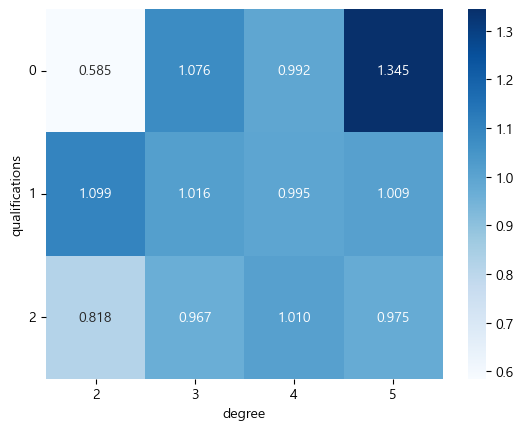

In [37]:
sns.heatmap(ratio_df_hue_ratio.iloc[:-1, :-1], cmap="Blues", annot=True, fmt=".3f")
plt.yticks(rotation=0)  # Adjust the rotation angle here (0 for horizontal, 90 for vertical)
plt.show()

## job_code_seq1 분석

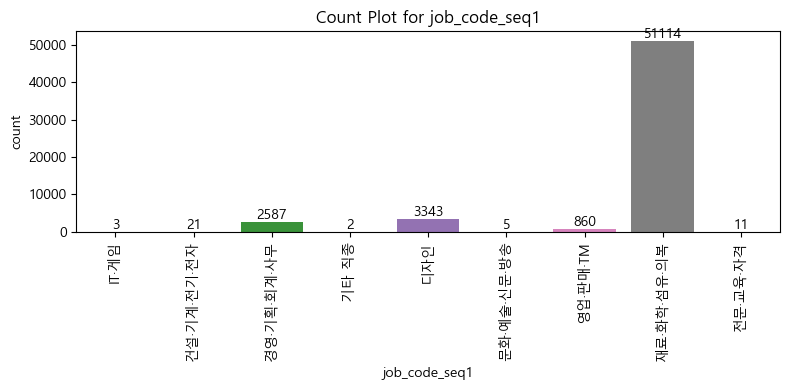

In [38]:
dav.draw_countplot(merged_df, ['job_code_seq1'], figsize=(8,4), rotate_xticks=True)

In [39]:
# 전체 공고의 0.5% = 289.73
limit_ratio = 0.005

### job_code_seq1 : address_seq1

In [40]:
count_df = create_count_dataframe(merged_df, 'address_seq1', 'job_code_seq1')
ratio_df_hue, ratio_df_hue_ratio = calculate_ratio_df_with_hue(merged_df, 'address_seq1', 'job_code_seq1', limit_ratio)

In [41]:
count_df

job_code_seq1,IT·게임,건설·기계·전기·전자,경영·기획·회계·사무,기타 직종,디자인,문화·예술·신문·방송,영업·판매·TM,재료·화학·섬유·의복,전문·교육·자격,Total
address_seq1,,,,,,,,,,
1.0,0,0,0,0,7,0,0,20,0,27
2.0,0,0,0,0,2,0,0,4,0,6
3.0,3,21,2507,1,3187,5,828,49713,11,56276
5.0,0,0,75,1,126,0,28,1245,0,1475
9.0,0,0,0,0,0,0,0,10,0,10
11.0,0,0,1,0,4,0,2,22,0,29
13.0,0,0,0,0,0,0,0,8,0,8
20.0,0,0,4,0,17,0,2,92,0,115
Total,3,21,2587,2,3343,5,860,51114,11,57946


In [42]:
analyze_chi_square(count_df);

Chi-square Statistic: 104.7790763949802
P-value: 8.493784675847549e-05
Degrees of Freedom: 56
Expected Frequencies:
job_code_seq1     IT·게임  건설·기계·전기·전자  경영·기획·회계·사무     기타 직종          디자인  \
address_seq1                                                               
1.0            0.001398     0.009785     1.205415  0.000932     1.557674   
2.0            0.000311     0.002174     0.267870  0.000207     0.346150   
3.0            2.913540    20.394781  2512.442826  1.942360  3246.654955   
5.0            0.076364     0.534549    65.851396  0.050909    85.095175   
9.0            0.000518     0.003624     0.446450  0.000345     0.576916   
11.0           0.001501     0.010510     1.294705  0.001001     1.673058   
13.0           0.000414     0.002899     0.357160  0.000276     0.461533   
20.0           0.005954     0.041677     5.134177  0.003969     6.634539   

job_code_seq1  문화·예술·신문·방송    영업·판매·TM   재료·화학·섬유·의복   전문·교육·자격  
address_seq1                                             

In [43]:
ratio_df_hue

job_code_seq1,경영·기획·회계·사무,디자인,영업·판매·TM,재료·화학·섬유·의복,Total
address_seq1,,,,,
3.0,0.969076,0.953335,0.962791,0.972591,0.971180
5.0,0.028991,0.037691,0.032558,0.024357,0.025455
Total,2587.000000,3343.000000,860.000000,51114.000000,57946.000000


In [44]:
ratio_df_hue_ratio

job_code_seq1,경영·기획·회계·사무,디자인,영업·판매·TM,재료·화학·섬유·의복,Total
address_seq1,,,,,
3.0,0.997834,0.981626,0.991362,1.001452,0.971180
5.0,1.138928,1.480695,1.279060,0.956888,0.025455
Total,2587.000000,3343.000000,860.000000,51114.000000,57946.000000


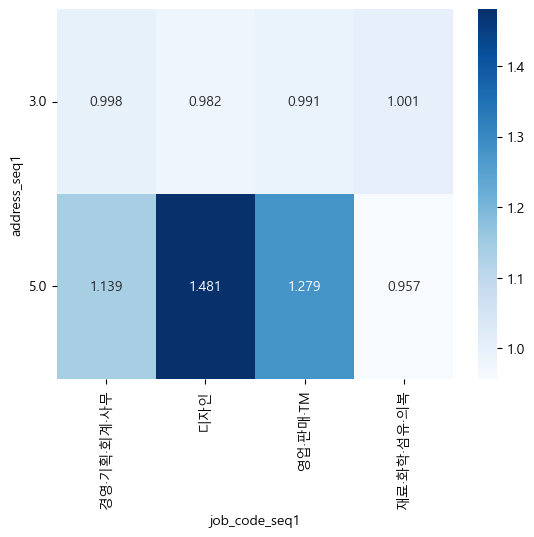

In [45]:
sns.heatmap(ratio_df_hue_ratio.iloc[:-1, :-1], cmap="Blues", annot=True, fmt=".3f")
plt.yticks(rotation=0)  # Adjust the rotation angle here (0 for horizontal, 90 for vertical)
plt.show()

### job_code_seq1 : education

In [46]:
count_df = create_count_dataframe(merged_df, 'education', 'job_code_seq1')
ratio_df_hue, ratio_df_hue_ratio = calculate_ratio_df_with_hue(merged_df, 'education', 'job_code_seq1', limit_ratio)

In [47]:
count_df

job_code_seq1,IT·게임,건설·기계·전기·전자,경영·기획·회계·사무,기타 직종,디자인,문화·예술·신문·방송,영업·판매·TM,재료·화학·섬유·의복,전문·교육·자격,Total
education,,,,,,,,,,
2,1,3,777,0,1167,2,284,12475,3,14712
3,1,6,967,1,1186,2,326,21613,2,24104
4,1,12,843,1,986,1,250,17019,6,19119
6,0,0,0,0,4,0,0,7,0,11
Total,3,21,2587,2,3343,5,860,51114,11,57946


In [48]:
analyze_chi_square(count_df);

Chi-square Statistic: 277.6334239726825
P-value: 5.175331702355071e-45
Degrees of Freedom: 24
Expected Frequencies:
job_code_seq1     IT·게임  건설·기계·전기·전자  경영·기획·회계·사무     기타 직종          디자인  \
education                                                                  
2              0.761675     5.331723   656.817451  0.507783   848.759466   
3              1.247920     8.735443  1076.123425  0.831947  1390.599386   
4              0.989835     6.928848   853.568029  0.659890  1103.006541   
6              0.000569     0.003986     0.491095  0.000380     0.634608   

job_code_seq1  문화·예술·신문·방송    영업·판매·TM   재료·화학·섬유·의복  전문·교육·자격  
education                                                       
2                 1.269458  218.346737  12977.412902  2.792807  
3                 2.079867  357.737204  21262.069099  4.575708  
4                 1.649726  283.752804  16864.814931  3.629396  
6                 0.000949    0.163255      9.703068  0.002088  


In [49]:
ratio_df_hue

job_code_seq1,경영·기획·회계·사무,디자인,영업·판매·TM,재료·화학·섬유·의복,Total
education,,,,,
2,0.300348,0.349088,0.330233,0.244062,0.253892
3,0.373792,0.354771,0.379070,0.422839,0.415973
4,0.325860,0.294945,0.290698,0.332962,0.329945
Total,2587.000000,3343.000000,860.000000,51114.000000,57946.000000


In [50]:
ratio_df_hue_ratio

job_code_seq1,경영·기획·회계·사무,디자인,영업·판매·TM,재료·화학·섬유·의복,Total
education,,,,,
2,1.182977,1.374948,1.300684,0.961286,0.253892
3,0.898596,0.852870,0.911283,1.016505,0.415973
4,0.987619,0.893920,0.881049,1.009142,0.329945
Total,2587.000000,3343.000000,860.000000,51114.000000,57946.000000


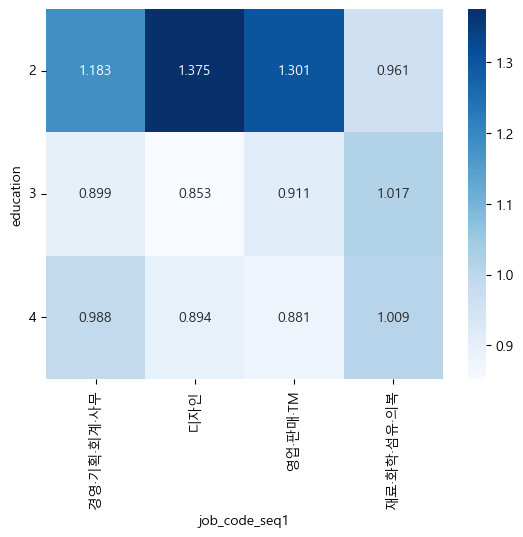

In [51]:
sns.heatmap(ratio_df_hue_ratio.iloc[:-1, :-1], cmap="Blues", annot=True, fmt=".3f")
plt.yticks(rotation=0)  # Adjust the rotation angle here (0 for horizontal, 90 for vertical)
plt.show()

### job_code_seq1 : major_task

In [52]:
count_df = create_count_dataframe(merged_df, 'major_task', 'job_code_seq1')
ratio_df_hue, ratio_df_hue_ratio = calculate_ratio_df_with_hue(merged_df, 'major_task', 'job_code_seq1', limit_ratio)

In [53]:
count_df

job_code_seq1,IT·게임,건설·기계·전기·전자,경영·기획·회계·사무,기타 직종,디자인,문화·예술·신문·방송,영업·판매·TM,재료·화학·섬유·의복,전문·교육·자격,Total
major_task,,,,,,,,,,
1,0,0,17,0,25,0,4,202,0,248
2,3,21,2515,2,3035,4,847,48516,11,54954
6,0,0,0,0,0,0,0,5,0,5
7,0,0,24,0,83,1,6,683,0,797
8,0,0,31,0,199,0,3,1673,0,1906
9,0,0,0,0,1,0,0,20,0,21
10,0,0,0,0,0,0,0,15,0,15
Total,3,21,2587,2,3343,5,860,51114,11,57946


In [54]:
analyze_chi_square(count_df);

Chi-square Statistic: 206.19135896474995
P-value: 1.6837438038073553e-21
Degrees of Freedom: 48
Expected Frequencies:
job_code_seq1     IT·게임  건설·기계·전기·전자  경영·기획·회계·사무     기타 직종          디자인  \
major_task                                                                 
1              0.012840     0.089877    11.071964  0.008560    14.307528   
2              2.845097    19.915680  2453.422117  1.896731  3170.386601   
6              0.000259     0.001812     0.223225  0.000173     0.288458   
7              0.041263     0.288838    35.582076  0.027508    45.980240   
8              0.098678     0.690747    85.093397  0.065785   109.960273   
9              0.001087     0.007611     0.937545  0.000725     1.211525   
10             0.000777     0.005436     0.669675  0.000518     0.865375   

job_code_seq1  문화·예술·신문·방송    영업·판매·TM   재료·화학·섬유·의복   전문·교육·자격  
major_task                                                       
1                 0.021399    3.680668    218.760087   0.047078  

In [55]:
ratio_df_hue_ratio

job_code_seq1,경영·기획·회계·사무,디자인,영업·판매·TM,재료·화학·섬유·의복,Total
major_task,,,,,
2,1.025099,0.957297,1.038506,1.000851,0.948366
7,0.674497,1.805123,0.507245,0.971507,0.013754
8,0.364306,1.809745,0.106053,0.995077,0.032893
Total,2587.000000,3343.000000,860.000000,51114.000000,57946.000000


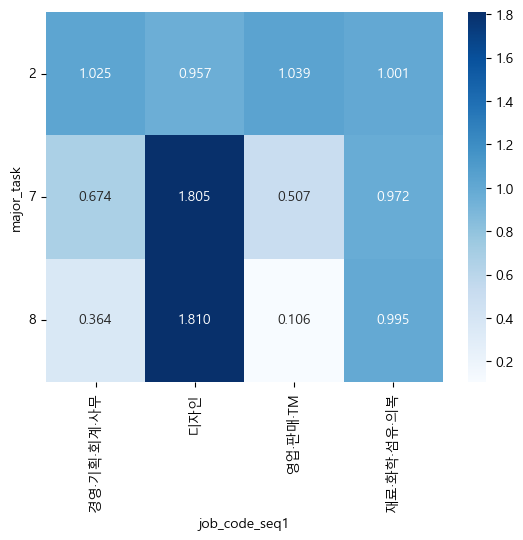

In [56]:
sns.heatmap(ratio_df_hue_ratio.iloc[:-1, :-1], cmap="Blues", annot=True, fmt=".3f")
plt.yticks(rotation=0)  # Adjust the rotation angle here (0 for horizontal, 90 for vertical)
plt.show()

### job_code_seq1 : qualifications

In [57]:
count_df = create_count_dataframe(merged_df, 'qualifications', 'job_code_seq1')
ratio_df_hue, ratio_df_hue_ratio = calculate_ratio_df_with_hue(merged_df, 'qualifications', 'job_code_seq1', limit_ratio)

In [58]:
count_df

job_code_seq1,IT·게임,건설·기계·전기·전자,경영·기획·회계·사무,기타 직종,디자인,문화·예술·신문·방송,영업·판매·TM,재료·화학·섬유·의복,전문·교육·자격,Total
qualifications,,,,,,,,,,
0,0,1,33,0,109,0,3,265,0,411
1,3,11,1579,1,2207,2,598,33401,9,37811
2,0,9,975,1,1027,3,259,17448,2,19724
Total,3,21,2587,2,3343,5,860,51114,11,57946


In [59]:
analyze_chi_square(count_df);

Chi-square Statistic: 391.6714684895406
P-value: 2.0237540955873892e-73
Degrees of Freedom: 16
Expected Frequencies:
job_code_seq1      IT·게임  건설·기계·전기·전자  경영·기획·회계·사무     기타 직종          디자인  \
qualifications                                                              
0               0.021278     0.148949    18.349101  0.014186    23.711266   
1               1.957564    13.702948  1688.072637  1.305043  2181.378749   
2               1.021158     7.148103   880.578263  0.680772  1137.909985   

job_code_seq1   문화·예술·신문·방송    영업·판매·TM   재료·화학·섬유·의복  전문·교육·자격  
qualifications                                                   
0                  0.035464    6.099817    362.541918  0.078021  
1                  3.262607  561.168329  33352.974390  7.177734  
2                  1.701929  292.731854  17398.483692  3.744245  


In [60]:
ratio_df_hue_ratio

job_code_seq1,경영·기획·회계·사무,디자인,영업·판매·TM,재료·화학·섬유·의복,Total
qualifications,,,,,
0,1.798453,4.596971,0.491818,0.730950,0.007093
1,0.935386,1.011745,1.065634,1.001440,0.652521
2,1.107227,0.902532,0.884769,1.002846,0.340386
Total,2587.000000,3343.000000,860.000000,51114.000000,57946.000000


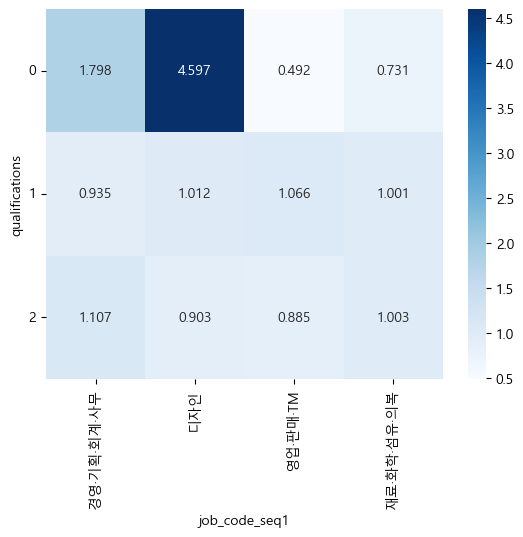

In [61]:
sns.heatmap(ratio_df_hue_ratio.iloc[:-1, :-1], cmap="Blues", annot=True, fmt=".3f")
plt.yticks(rotation=0)  # Adjust the rotation angle here (0 for horizontal, 90 for vertical)
plt.show()

# 인기도 가중치

In [62]:
def create_weight_df(origin_df, popularity_df, target_cols, grouping_col, limit_ratio=0.005):
    merged_df = popularity_df.copy()
    weight_dfs = []
    for target_col in target_cols:
        _, ratio_df_hue_ratio = calculate_ratio_df_with_hue(origin_df, target_col, grouping_col, limit_ratio)

        weight_df = ratio_df_hue_ratio.iloc[:-1, :-1].reset_index()
        weight_df = weight_df.melt(id_vars=target_col, var_name=grouping_col, value_name=f'{target_col}_weight')
        weight_dfs.append(weight_df)
        
        merged_df = merged_df.merge(weight_df, how='inner', on=[grouping_col, target_col])
    return merged_df, weight_dfs

In [63]:
mms = MinMaxScaler()
stds = StandardScaler()

## degree

### degree별 공고 지원 수

In [64]:
degree_pop = merged_df.groupby(['degree', 'recruitment_seq']).size().to_frame().reset_index()
degree_pop.rename(columns={0:'count'}, inplace=True)
degree_pop = degree_pop.sort_values(['degree', 'count'], ascending=[True,False])

In [65]:
degree_pop['score'] = degree_pop.groupby('degree')['count'].apply(lambda g: g/max(g))

### 비율 가중치

In [66]:
degree_pop = degree_pop.merge(recruitment, how='inner', on='recruitment_seq')
degree_pop.head()

,degree,recruitment_seq,count,score,address_seq1,education,major_task,qualifications
0,2,R04150,4,1.000000,3.0,3,2,1
1,3,R04150,0,0.000000,3.0,3,2,1
2,4,R04150,8,0.121212,3.0,3,2,1
3,5,R04150,1,0.142857,3.0,3,2,1
4,6,R04150,0,0.000000,3.0,3,2,1


#### recruitment_feature : degree 가중치

In [67]:
degree_weight_pop, weight_dfs = create_weight_df(merged_df, degree_pop, ['address_seq1', 'education',
                                                      'major_task', 'qualifications'], 'degree')

In [68]:
degree_weight_pop_columns = degree_weight_pop.filter(like='_weight').columns
degree_weight_pop['multiplied_weight'] = degree_weight_pop.loc[:, degree_weight_pop_columns].prod(axis=1)
degree_weight_pop['w_score'] = degree_weight_pop.loc[:, ['score', 'multiplied_weight']].prod(axis=1)

## job_code_seq1

### job_code_seq1별 공고 지원 수

In [69]:
job_code_pop = merged_df.groupby(['job_code_seq1', 'recruitment_seq']).size().to_frame().reset_index()
job_code_pop.rename(columns={0:'count'}, inplace=True)
job_code_pop = job_code_pop.sort_values(['job_code_seq1', 'count'], ascending=[True,False])

In [70]:
job_code_pop['score'] = job_code_pop.groupby('job_code_seq1')['count'].apply(lambda g: g/max(g))

### 비율 가중치

In [71]:
job_code_pop = job_code_pop.merge(recruitment, how='inner', on='recruitment_seq')
job_code_pop.head()

,job_code_seq1,recruitment_seq,count,score,address_seq1,education,major_task,qualifications
0,IT·게임,R02682,1,1.0,3.0,2,2,1
1,건설·기계·전기·전자,R02682,0,0.0,3.0,2,2,1
2,경영·기획·회계·사무,R02682,0,0.0,3.0,2,2,1
3,기타 직종,R02682,0,0.0,3.0,2,2,1
4,디자인,R02682,0,0.0,3.0,2,2,1


#### recruitment_feature : job_code_seq1 가중치

In [72]:
job_code_weight_pop, weight_dfs = create_weight_df(merged_df, job_code_pop, ['address_seq1', 'education',
                                                      'major_task', 'qualifications'], 'job_code_seq1')

In [73]:
job_code_weight_pop_columns = job_code_weight_pop.filter(like='_weight').columns
job_code_weight_pop['multiplied_weight'] = job_code_weight_pop.loc[:, job_code_weight_pop_columns].prod(axis=1)
job_code_weight_pop['w_score'] = job_code_weight_pop.loc[:, ['score', 'multiplied_weight']].prod(axis=1)

# 모델 결과 생성

## idx 디코딩

### 디코딩 딕셔너리 로드

In [74]:
DATA_PATH = '../data/'

In [75]:
resume_decode = pd.read_csv(f"{DATA_PATH}idx_2_resume.txt", delimiter=" ", header=None)
resume_decode = resume_decode.set_index(0).to_dict()[1]

In [76]:
recruitment_decode = pd.read_csv(f"{DATA_PATH}/idx_2_recruitment.txt", delimiter=" ", header=None)
recruitment_decode = recruitment_decode.set_index(0).to_dict()[1]

## CF 모델

In [77]:
DATA_SET = "JOB"

In [78]:
CF_FOLDER_PATH = '../CF/results/'
cf_proba = pd.read_csv(f'{CF_FOLDER_PATH}pred_prob_{DATA_SET}.txt', delimiter=' ', header=None)
cf_rating_idx = pd.read_csv(f'{CF_FOLDER_PATH}pred_idx_{DATA_SET}.txt', delimiter=' ', header=None)

In [79]:
cf_score = create_score_dataframe(cf_proba, cf_rating_idx, "cf")
cf_score.head()

,resume_idx,recruitment_idx,cf_score
0,0,357,1.000000
1,0,2832,0.838635
2,0,156,0.731138
3,0,5164,0.700984
4,0,4670,0.672044


In [80]:
sbm_cf = create_submission(cf_rating_idx, resume_decode, recruitment_decode)

## LTOCF 모델

In [81]:
LTOCF_FOLDER_PATH = '../LT-OCF/results/'
LTOCF_FILE_NAME = 'JOB_360_0.0030__319'

In [82]:
lt_proba = pd.read_csv(f'{LTOCF_FOLDER_PATH}proba_{LTOCF_FILE_NAME}.txt', delimiter=' ', header=None)
lt_rating_idx= pd.read_csv(f'{LTOCF_FOLDER_PATH}rating_{LTOCF_FILE_NAME}.txt', delimiter=' ', header=None)
lt_user = pd.read_csv(f'{LTOCF_FOLDER_PATH}user_{LTOCF_FILE_NAME}.txt', delimiter=' ', header=None)

In [83]:
lt_proba_df = pd.concat([lt_user, lt_proba], axis=1)
lt_idx_df = pd.concat([lt_user, lt_rating_idx], axis=1)

In [84]:
ltocf_score = create_score_dataframe(lt_proba_df, lt_idx_df, "ltocf")
ltocf_score.head()

,resume_idx,recruitment_idx,ltocf_score
0,0,357,0.999983
1,0,156,0.999955
2,0,1965,0.999934
3,0,1030,0.999892
4,0,2832,0.999884


In [85]:
lt_idx_df.columns = range(lt_idx_df.shape[1])

In [112]:
sbm_ltocf = create_submission(lt_idx_df, resume_decode, recruitment_decode)
sbm_ltocf

,resume_seq,recruitment_seq
0,U05833,R00585
8482,U05833,R03943
16964,U05833,R02130
25446,U05833,R05895
33928,U05833,R01455
...,...,...
8481,U05310,R05742
16963,U05310,R01690
25445,U05310,R04643
33927,U05310,R00780


# 모델 결과 + 인기도 가중치

## CF 모델 인기도 가중치 적용

In [86]:
cf_score['resume_seq'] = cf_score['resume_idx'].apply(lambda x: resume_decode[x])
cf_score['recruitment_seq'] = cf_score['recruitment_idx'].apply(lambda x: recruitment_decode[x])
cf_score.head()

,resume_idx,recruitment_idx,cf_score,resume_seq,recruitment_seq
0,0,357,1.000000,U05833,R00585
1,0,2832,0.838635,U05833,R01455
2,0,156,0.731138,U05833,R03943
3,0,5164,0.700984,U05833,R00304
4,0,4670,0.672044,U05833,R04100


In [87]:
cf_score = cf_score.merge(resume, how='inner', on='resume_seq')
cf_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169640 entries, 0 to 169639
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   resume_idx       169640 non-null  int64   
 1   recruitment_idx  169640 non-null  int64   
 2   cf_score         169640 non-null  float64 
 3   resume_seq       169640 non-null  object  
 4   recruitment_seq  169640 non-null  object  
 5   degree           169640 non-null  category
 6   job_code_seq1    169640 non-null  category
dtypes: category(2), float64(1), int64(2), object(2)
memory usage: 8.1+ MB


### job_code_seq1

In [88]:
job_code_weight_pop_view = job_code_weight_pop[['job_code_seq1', 'recruitment_seq',
                                            'score', 'w_score']]

In [89]:
cf_score_pop = cf_score.merge(job_code_weight_pop_view, how='left', on=['job_code_seq1', 'recruitment_seq'])
cf_score_pop[['score', 'w_score']] = cf_score_pop[['score', 'w_score']].fillna(0)
cf_score_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169640 entries, 0 to 169639
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   resume_idx       169640 non-null  int64   
 1   recruitment_idx  169640 non-null  int64   
 2   cf_score         169640 non-null  float64 
 3   resume_seq       169640 non-null  object  
 4   recruitment_seq  169640 non-null  object  
 5   degree           169640 non-null  category
 6   job_code_seq1    169640 non-null  object  
 7   score            169640 non-null  float64 
 8   w_score          169640 non-null  float64 
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 11.8+ MB


In [90]:
cf_score_pop.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
resume_idx,169640.0,NaN,NaN,NaN,4240.5,2448.549692,0.0,2120.0,4240.5,6361.0,8481.0
recruitment_idx,169640.0,NaN,NaN,NaN,2850.453726,1872.30681,0.0,1199.0,2620.0,4379.0,6694.0
cf_score,169640.0,NaN,NaN,NaN,0.593013,0.187604,0.030609,0.455863,0.568773,0.708391,1.0
resume_seq,169640,8482,U05833,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_seq,169640,6677,R03237,481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree,169640.0,5.0,4.0,149060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_code_seq1,169640,9,재료·화학·섬유·의복,145760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,169640.0,NaN,NaN,NaN,0.203885,0.148396,0.0,0.117647,0.162162,0.254902,1.0
w_score,169640.0,NaN,NaN,NaN,0.206951,0.156792,0.0,0.119168,0.170274,0.259453,2.421581


#### MinMax Scaling

In [91]:
# cf_score_pop['w_score'] = mms.fit_transform(cf_score_pop['w_score'].values.reshape(-1,1))
# cf_score_pop['cf_score'] = mms.fit_transform(cf_score_pop['cf_score'].values.reshape(-1,1))

In [92]:
cf_score_pop['s_score'] = cf_score_pop.groupby('resume_idx')['score'].transform(
    lambda x: (mms.fit_transform(x.values.reshape(-1,1))).reshape(-1))
cf_score_pop['sw_score'] = cf_score_pop.groupby('resume_idx')['w_score'].transform(
    lambda x: (mms.fit_transform(x.values.reshape(-1,1))).reshape(-1))
cf_score_pop['scf_score'] = cf_score_pop.groupby('resume_idx')['cf_score'].transform(
    lambda x: (mms.fit_transform(x.values.reshape(-1,1))).reshape(-1))

#### RECALL 계산

##### 단순인기도

In [93]:
pop_scores = create_ensemble_submission_2col(cf_score_pop, 'scf_score', 's_score', start=94, end=101, step=100)

0.94 : 0.06


In [94]:
pop_scores['0.94:0.06'].to_csv('./CF_JOB(0.94_0.06).csv', index=False)

##### 가중치 인기도

In [95]:
pop_scores = create_ensemble_submission_2col(cf_score_pop, 'scf_score', 'sw_score', start=92, end=100, step=100)

0.92 : 0.08


In [96]:
pop_scores['0.92:0.08'].to_csv('./CF_JOB_W(0.92_0.08).csv', index=False)

## LTOCF 모델 인기도 가중치 적용

In [97]:
ltocf_score['resume_seq'] = ltocf_score['resume_idx'].apply(lambda x: resume_decode[x])
ltocf_score['recruitment_seq'] = ltocf_score['recruitment_idx'].apply(lambda x: recruitment_decode[x])
ltocf_score.head()

,resume_idx,recruitment_idx,ltocf_score,resume_seq,recruitment_seq
0,0,357,0.999983,U05833,R00585
1,0,156,0.999955,U05833,R03943
2,0,1965,0.999934,U05833,R02130
3,0,1030,0.999892,U05833,R05895
4,0,2832,0.999884,U05833,R01455


In [98]:
ltocf_score = ltocf_score.merge(resume, how='inner', on='resume_seq')
ltocf_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169640 entries, 0 to 169639
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   resume_idx       169640 non-null  int64   
 1   recruitment_idx  169640 non-null  int64   
 2   ltocf_score      169640 non-null  float64 
 3   resume_seq       169640 non-null  object  
 4   recruitment_seq  169640 non-null  object  
 5   degree           169640 non-null  category
 6   job_code_seq1    169640 non-null  category
dtypes: category(2), float64(1), int64(2), object(2)
memory usage: 8.1+ MB


### job_code_seq1

In [99]:
job_code_weight_pop_view = job_code_weight_pop[['job_code_seq1', 'recruitment_seq',
                                            'score', 'w_score']]

In [100]:
ltocf_score_pop = ltocf_score.merge(job_code_weight_pop_view, how='left', on=['job_code_seq1', 'recruitment_seq'])
ltocf_score_pop[['score', 'w_score']] = ltocf_score_pop[['score', 'w_score']].fillna(0)
ltocf_score_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169640 entries, 0 to 169639
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   resume_idx       169640 non-null  int64   
 1   recruitment_idx  169640 non-null  int64   
 2   ltocf_score      169640 non-null  float64 
 3   resume_seq       169640 non-null  object  
 4   recruitment_seq  169640 non-null  object  
 5   degree           169640 non-null  category
 6   job_code_seq1    169640 non-null  object  
 7   score            169640 non-null  float64 
 8   w_score          169640 non-null  float64 
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 11.8+ MB


In [101]:
ltocf_score_pop.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
resume_idx,169640.0,NaN,NaN,NaN,4240.5,2448.549692,0.0,2120.0,4240.5,6361.0,8481.0
recruitment_idx,169640.0,NaN,NaN,NaN,2869.061442,1864.643315,0.0,1229.0,2654.0,4390.0,6693.0
ltocf_score,169640.0,NaN,NaN,NaN,0.997694,0.003727,0.921966,0.997131,0.999147,0.999844,1.0
resume_seq,169640,8482,U05833,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_seq,169640,6458,R01214,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree,169640.0,5.0,4.0,149060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_code_seq1,169640,9,재료·화학·섬유·의복,145760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,169640.0,NaN,NaN,NaN,0.200483,0.137548,0.0,0.117647,0.176471,0.254902,1.0
w_score,169640.0,NaN,NaN,NaN,0.203449,0.145214,0.0,0.119168,0.170274,0.258196,2.421581


#### MinMax Scaling

In [102]:
# ltocf_score_pop['w_score'] = mms.fit_transform(ltocf_score_pop['w_score'].values.reshape(-1,1))
# ltocf_score_pop['ltocf_score'] = mms.fit_transform(ltocf_score_pop['ltocf_score'].values.reshape(-1,1))

In [103]:
ltocf_score_pop['s_score'] = ltocf_score_pop.groupby('resume_idx')['score'].transform(
    lambda x: (mms.fit_transform(x.values.reshape(-1,1))).reshape(-1))
ltocf_score_pop['sw_score'] = ltocf_score_pop.groupby('resume_idx')['w_score'].transform(
    lambda x: (mms.fit_transform(x.values.reshape(-1,1))).reshape(-1))
ltocf_score_pop['scf_score'] = ltocf_score_pop.groupby('resume_idx')['ltocf_score'].transform(
    lambda x: (mms.fit_transform(x.values.reshape(-1,1))).reshape(-1))

#### RECALL 계산

##### 단순인기도

In [108]:
pop_scores = create_ensemble_submission_2col(ltocf_score_pop, 'scf_score', 's_score', start=100, end=101, step=100)

1.00 : 0.00


In [109]:
pop_scores['1.00:0.00'].to_csv('./LTOCF_JOB(1.00_0.00).csv', index=False)

##### 가중치 인기도

In [106]:
pop_scores = create_ensemble_submission_2col(ltocf_score_pop, 'scf_score', 'sw_score', start=86, end=100, step=100)

0.86 : 0.14


In [107]:
pop_scores['0.86:0.14'].to_csv('./LTOCF_JOB_W(0.86_0.14).csv', index=False)